# PQC Haar Measure

In [15]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *
from quantum_circuits import *
from kraus_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
print(pqc_basic(3, 3))

     ┌──────────────┐┌─────────────┐     ┌─────────────┐ ┌────────────┐»
q_0: ┤ Ry(-0.78829) ├┤ Rz(0.61989) ├──■──┤ Ry(-2.7766) ├─┤ Rz(1.3074) ├»
     └┬────────────┬┘├─────────────┤┌─┴─┐└─────────────┘ ├────────────┤»
q_1: ─┤ Ry(2.8319) ├─┤ Rz(-2.1613) ├┤ X ├───────■────────┤ Ry(2.3008) ├»
      ├────────────┤ ├─────────────┤└───┘     ┌─┴─┐     ┌┴────────────┤»
q_2: ─┤ Ry(1.4577) ├─┤ Rz(-2.1615) ├──────────┤ X ├─────┤ Ry(0.63532) ├»
      └────────────┘ └─────────────┘          └───┘     └─────────────┘»
«                         ┌────────────┐┌─────────────┐                    »
«q_0: ─────────────────■──┤ Ry(2.0888) ├┤ Rz(-1.9892) ├─────────────────■──»
«     ┌─────────────┐┌─┴─┐└────────────┘├─────────────┤ ┌───────────┐ ┌─┴─┐»
«q_1: ┤ Rz(-3.0123) ├┤ X ├──────■───────┤ Ry(-1.8074) ├─┤ Rz(-1.23) ├─┤ X ├»
«     └┬────────────┤└───┘    ┌─┴─┐     ├─────────────┤┌┴───────────┴┐└───┘»
«q_2: ─┤ Rz(2.9525) ├─────────┤ X ├─────┤ Ry(-1.9992) ├┤ Rz(0.15555) ├─────»
«      └────────────┘      

In [6]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

fid_list = []
bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(1, 11):
    for i in tqdm(range(10000)):
        U1 = Operator(pqc_basic(n, L)).data
        U2 = Operator(pqc_basic(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

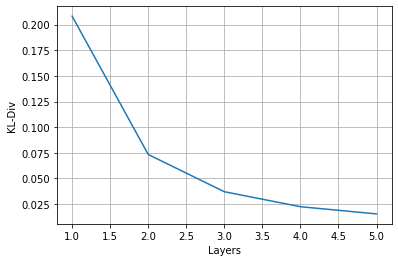

In [8]:
plt.plot(list(range(1,6)), KL_list)
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.show()

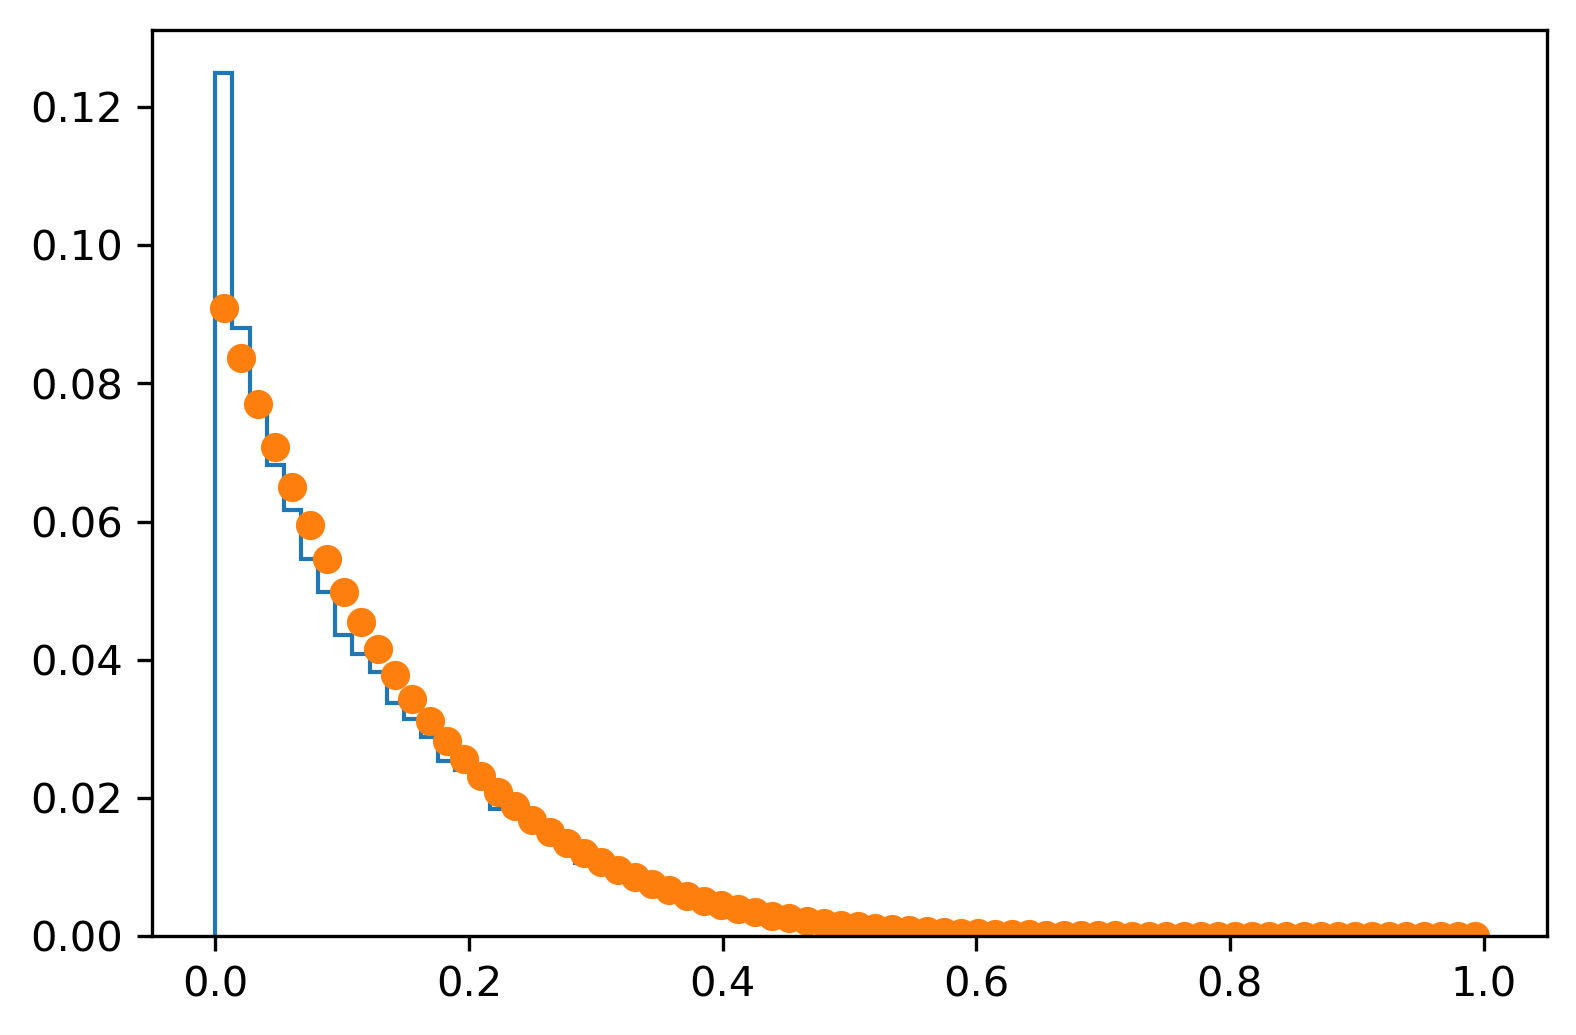

In [9]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o")
plt.show()

In [10]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)

fid_list = []
bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(1, 9):
    for i in tqdm(range(10000)):
        U1 = Operator(pqc_basic(n, L)).data
        U2 = Operator(pqc_basic(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

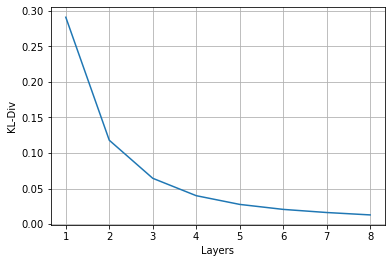

In [11]:
plt.plot(list(range(1, 9)), KL_list)
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.show()

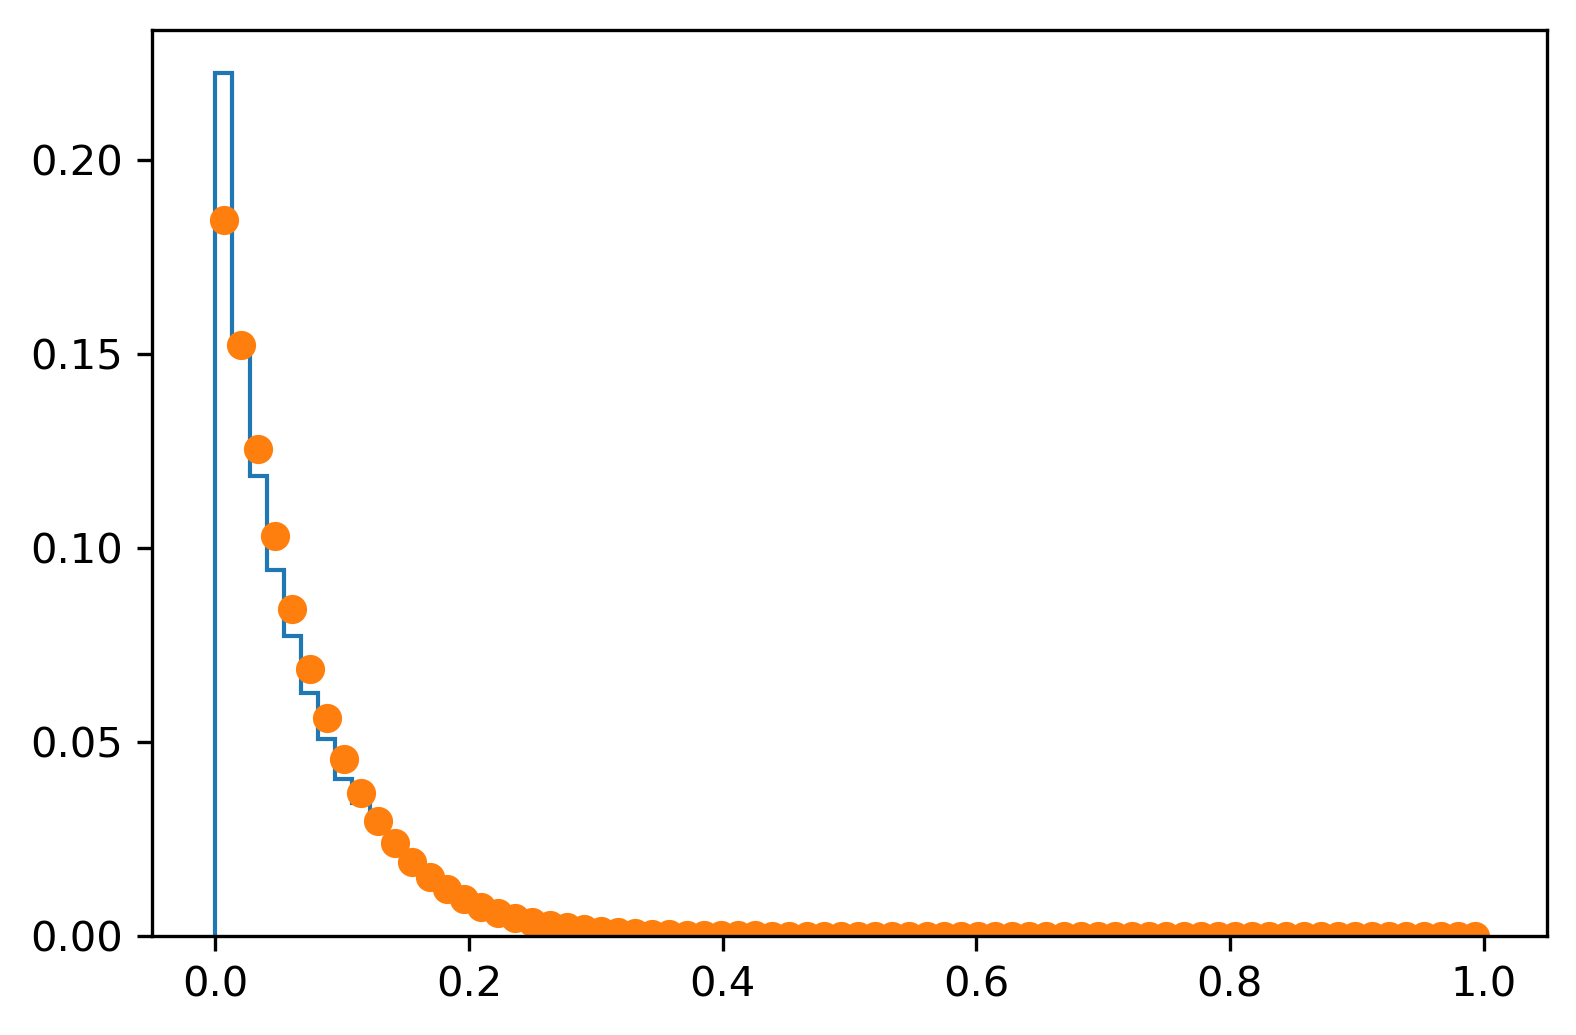

In [12]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o")
plt.show()

In [17]:
channel = KrausMap(d=2**10, rank=2)

In [18]:
spectrum = channel_spectrum(channel, use_coords=True)

ResourceExhaustedError: OOM when allocating tensor with shape[1024,1024,1024,1024] and type complex128 on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Mul]